### Sharon Laurance Muthipeedika
### 312486

In [3]:
#Import required Libraries
from torch.utils.data import Dataset,DataLoader
import torch
import os
import torch.nn as nn
import cv2
from math import sqrt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
import warnings
warnings.filterwarnings("ignore")

In [4]:
class Dataset(Dataset):
    
    def __init__(self):
        self.filepath='/kaggle/input/car-steering-angle-prediction/driving_dataset/'
        self.filenames= os.listdir(self.filepath)
        
    def __len__(self):
        return len(self.filenames)
    
    def __getitem__(self, index):
        
        filename=self.filenames[index]
        img= cv2.imread(self.filepath+filename)
        
        
        filename=self.filenames[0]
        img0= cv2.imread(self.filepath+filename)

        
        if img is None:
            print('Wrong path:',self.filepath) #If the image is None to avoid error Image 0 is processed
            resized=cv2.resize(img0 ,(32,32), interpolation= cv2.INTER_AREA)
            return torch.from_numpy(resized.transpose()).float(),torch.rand(1)
        else:
            resized=cv2.resize(img ,(32,32), interpolation= cv2.INTER_AREA)
            return torch.from_numpy(resized.transpose()).float(),torch.rand(1)       

In [5]:
class Dataset1(Dataset):
    
    def __init__(self):
        self.filepath='/kaggle/input/car-steering-angle-prediction/driving_dataset/'
        self.filenames= os.listdir(self.filepath)
        
    def __len__(self):
        return len(self.filenames)
    
    def __getitem__(self, index):
        
        filename=self.filenames[index]
        img= cv2.imread(self.filepath+filename)
        
        
        filename=self.filenames[0]
        img0= cv2.imread(self.filepath+filename)
        
        if img is None:
            print('Wrong path:',self.filepath)
            resized=cv2.resize(img0 ,(32,32), interpolation= cv2.INTER_AREA)
            return torch.from_numpy(resized.transpose()).float(),torch.rand(1)
        else:
            plt.imshow(img)
            resized=cv2.resize(img ,(32,32), interpolation= cv2.INTER_AREA)
            return torch.from_numpy(resized.transpose()).float(),torch.rand(1)


In [6]:
class Dataset2(Dataset):
    
    def __init__(self):
        self.filepath='/kaggle/input/car-steering-angle-prediction/driving_dataset/'
        self.filenames= os.listdir(self.filepath)
        
    def __len__(self):
        return len(self.filenames)
    
    def __getitem__(self, index):
        
        filename=self.filenames[index]
        img= cv2.imread(self.filepath+filename)
        
        
        filename=self.filenames[0]
        img0= cv2.imread(self.filepath+filename)

        
        
        if img is None:
            print('Wrong path:',self.filepath)
            img_cutout=apply_mask(img0,16,1)
            resized=cv2.resize(img_cutout ,(32,32), interpolation= cv2.INTER_AREA)
            
#             plt.imshow(img2)
            return torch.from_numpy(resized.transpose()).float(),torch.rand(1)
        else:
            img_cutout_1=apply_mask(img,16,1)
            plt.imshow(img_cutout_1)
            resized=cv2.resize(img_cutout_1 ,(32,32), interpolation= cv2.INTER_AREA)
#             print(resized.shape)
            
            return torch.from_numpy(resized.transpose()).float(),torch.rand(1)
            


In [7]:
#Mask Image for Cutout
def apply_mask(image, size=16, n_squares=1):
    h, w, channels = image.shape
    new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2,:] = 0
    return new_image

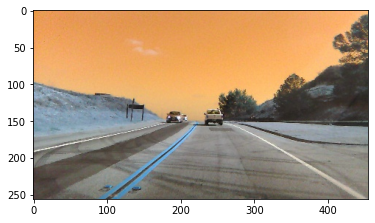

In [7]:
obj1=Dataset1()
a,b=obj1[2]

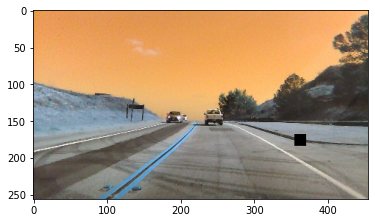

In [8]:
obj1=Dataset2()
a,b=obj1[2]

#### Cutout is a simple regularization technique for convolutional neural networks that involves removing contiguous sections of input images, effectively augmenting the dataset with partially occluded versions of existing samples.Thus we can see cutout in image 2 being implemented

https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets

#### Divide these resulting arrays into corresponding train/validation/test splits. Leave the last 10k images for testing (images are id’ed). You are free to define the length of the validation split.

In [8]:
dataset = Dataset()
validation_split = .2
test_split=0.22
shuffle_dataset = True
random_seed= 3116

# Creating data indices for training and test splits:
dataset_size = len(dataset)
# print(dataset_size)
indices = list(range(dataset_size))
# split = int(np.floor(validation_split * dataset_size))
split = int(np.floor(test_split * dataset_size)) #This leads to having 10k images for testing
split_val = int(np.floor(validation_split * dataset_size)) #Validation Split size is 0.2*training_set

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
# train_indices, val_indices = indices[split:], indices[:split]
train_indices, test_indices = indices[split:], indices[:split]
train_indices, val_indices = train_indices[split_val:], train_indices[:split_val]

print("Length of Training Samples is :",len(train_indices))
print("Length of Validation Samples is :",len(val_indices))
print("Length of Testing Samples is :",len(test_indices))
# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader1 = torch.utils.data.DataLoader(dataset, batch_size=60,sampler=train_sampler)
validation_loader1 = torch.utils.data.DataLoader(dataset, batch_size=60,sampler=valid_sampler)
test_loader1 = torch.utils.data.DataLoader(dataset, batch_size=60,sampler=test_sampler)

Length of Training Samples is : 26431
Length of Validation Samples is : 9114
Length of Testing Samples is : 10025


In [9]:
class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1)
        #Here convulutional network is implemented from the paper End to End Learning for Self-Driving Cars
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, 5 , stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(36, 48, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(48, 64, 3, padding=1),
            nn.ELU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.Dropout(0.5)
        )
        
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=64, out_features=100),
            nn.ELU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ELU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )
        
    def forward(self, input):
        """Forward pass."""
#         print("Input shape is",input.shape)
        input = input.view(input.size(0),3,32,32)
        
        output = self.conv_layers(input)
        # print(output.shape)
        output = output.view(output.size(0), -1)
#         print(output.shape)
        output = self.linear_layers(output)
        return output

In [ ]:
net=ConvNet()
optimizer= torch.optim.Adam(net.parameters(), lr=1e-3)
criterion= torch.nn.MSELoss()
train_loss=0.0
for i, sample_batched in enumerate(train_loader1):
    optimizer.zero_grad()
    yhat= net(sample_batched[0])
    loss= criterion(yhat.squeeze(), torch.rand(1))
    loss.backward()
    optimizer.step()
    
    train_loss += loss.data.item()
    if i % 100 == 0:
            print("Training Epoch: {} | Loss: {}".format(1, train_loss / (i + 1)))

    
valid_loss = 0
with torch.no_grad():
    for i, sample_batched in enumerate(validation_loader1):
        optimizer.zero_grad()
        yhat= net(sample_batched[0])
        loss= criterion(yhat.squeeze(), torch.rand(1))

        valid_loss+=loss.data.item()

        if i % 100 == 0:
                print("Validation Loss: {}".format(valid_loss / (i + 1)))
 
test_loss=0
with torch.no_grad():
    for i, sample_batched in enumerate(test_loader1):
        optimizer.zero_grad()
        yhat= net(sample_batched[0])
        loss= criterion(yhat.squeeze(), torch.rand(1))

        test_loss+=loss.data.item()

        if i % 10025 == 0:
                print("Total Test RMSE Loss: {}".format(sqrt(test_loss / (i + 1))))
    

        


#### **1. Tune the associated hyperparameters such as batch_size, number_of_layers, kernel_sizes, learning_rate, l1_regularization, l2_regularization coefficients etc. Either implement Random Search or Hyperband.**

#### Taking all hyperparameters was becoming computationally expensive in random search. Therefore i have selected batch_size and learning rate for hyperparameter tuning. Generally hyperparameters for CNN are batch_size, number_of_layers, kernel_sizes, learning_rate,l1_regularization, l2_regularization coefficients

In [19]:
def find_accuracy(learning_rate,train_loader,validation_loader):
    net=ConvNet()
    optimizer= torch.optim.Adam(net.parameters(), lr=learning_rate)
    criterion= torch.nn.MSELoss()
    n_epoch=2
    for epoch in range(n_epoch):
        train_loss=0.0
        for i, sample_batched in enumerate(train_loader):
            optimizer.zero_grad()
            yhat= net(sample_batched[0])
            loss= criterion(yhat.squeeze(), torch.rand(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.data.item()
            if i % 100 == 0:
                print("Training Epoch: {} | Loss: {}".format(epoch, train_loss / (i + 1)))
        valid_loss = 0
        with torch.no_grad():
            for i, sample_batched in enumerate(validation_loader):
                optimizer.zero_grad()
                yhat= net(sample_batched[0])
                loss= criterion(yhat.squeeze(), torch.rand(1))
                
                
                valid_loss+=loss.data.item()

                if i % 100 == 0:
                    print("Validation Epoch: {} |Validation Loss: {}".format(epoch, valid_loss / (i + 1)))
    
    return train_loss,valid_loss

In [20]:
batch_size=[60,120]
learning_rate=[1e-1,1e-3]
train_loss_arr=[]
valid_loss_arr=[]
for i in batch_size:
    for j in learning_rate:
        print("Hyperparameter selected is batch_size ",i," learning_rate ",j)
        train_loader = torch.utils.data.DataLoader(dataset, batch_size=i,sampler=train_sampler)
        validation_loader = torch.utils.data.DataLoader(dataset, batch_size=i,sampler=valid_sampler)
        train_loss,valid_loss=find_accuracy(j,train_loader,validation_loader)
        train_loss_arr.append(train_loss)
        valid_loss_arr.append(valid_loss)

Hyperparameter selected is batch_size  60  learning_rate  0.1
Training Epoch: 0 | Loss: 1.075197696685791
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/


Premature end of JPEG file


Training Epoch: 0 | Loss: 677781606647.7062
Training Epoch: 0 | Loss: 340578090721.0957
Training Epoch: 0 | Loss: 227429446170.38034
Training Epoch: 0 | Loss: 170713972243.11612
Validation Epoch: 0 |Validation Loss: 97771.25
Validation Epoch: 0 |Validation Loss: 139771.51005569307
Training Epoch: 1 | Loss: 76776.3828125
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/
Training Epoch: 1 | Loss: 137598.3661819307
Training Epoch: 1 | Loss: 121420.18182524876


Premature end of JPEG file


Training Epoch: 1 | Loss: 101286.90783326412
Training Epoch: 1 | Loss: 85077.13553275015
Validation Epoch: 1 |Validation Loss: 44490.58984375
Validation Epoch: 1 |Validation Loss: 31334.979907951732
Hyperparameter selected is batch_size  60  learning_rate  0.001
Training Epoch: 0 | Loss: 0.6484041213989258


Premature end of JPEG file


Training Epoch: 0 | Loss: 0.13220519865955235
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/
Training Epoch: 0 | Loss: 0.11527011798149142
Training Epoch: 0 | Loss: 0.10874017161290869
Training Epoch: 0 | Loss: 0.10075486446292421
Validation Epoch: 0 |Validation Loss: 0.0005629704101011157
Validation Epoch: 0 |Validation Loss: 0.09744928497035865
Training Epoch: 1 | Loss: 0.021082576364278793
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/
Training Epoch: 1 | Loss: 0.08105444977789573
Training Epoch: 1 | Loss: 0.08718999415063831
Training Epoch: 1 | Loss: 0.08989644357735412


Premature end of JPEG file


Training Epoch: 1 | Loss: 0.09118855381618919
Validation Epoch: 1 |Validation Loss: 0.1708335280418396
Validation Epoch: 1 |Validation Loss: 0.10016722891189844
Hyperparameter selected is batch_size  120  learning_rate  0.1
Training Epoch: 0 | Loss: 0.15392117202281952
Training Epoch: 0 | Loss: 2.970131507497413e+16
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/


Premature end of JPEG file


Training Epoch: 0 | Loss: 1.4924542152301318e+16
Validation Epoch: 0 |Validation Loss: 394446208.0
Training Epoch: 1 | Loss: 311097952.0
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/


Premature end of JPEG file


Training Epoch: 1 | Loss: 356330133.5445545
Training Epoch: 1 | Loss: 323030856.5970149
Validation Epoch: 1 |Validation Loss: 323605024.0
Hyperparameter selected is batch_size  120  learning_rate  0.001
Training Epoch: 0 | Loss: 0.02679133601486683


Premature end of JPEG file


Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/
Training Epoch: 0 | Loss: 0.09689245128855432
Training Epoch: 0 | Loss: 0.09007947483497894
Validation Epoch: 0 |Validation Loss: 0.012788450345396996
Training Epoch: 1 | Loss: 0.2597372233867645
Training Epoch: 1 | Loss: 0.08435736958651459
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/


Premature end of JPEG file


Training Epoch: 1 | Loss: 0.09064611606248293
Validation Epoch: 1 |Validation Loss: 0.029235290363430977


#### **2. Implement the regularization scheme named "Cutout" as proposed in the paper titled, "Improved Regularization of Convolutional Neural Networks with Cutout" (landing page here: https:// arxiv.org/abs/1708.04552).**

In [22]:
#Dataset2 masks image using Cutout Regularisation
dataset = Dataset2()
validation_split = .2
test_split=0.22
shuffle_dataset = True
random_seed= 3116

# Creating data indices for training and test splits:
dataset_size = len(dataset)
# print(dataset_size)
indices = list(range(dataset_size))
# split = int(np.floor(validation_split * dataset_size))
split = int(np.floor(test_split * dataset_size)) #This leads to having 10k images for testing
split_val = int(np.floor(validation_split * dataset_size)) #Validation Split size is 0.2*training_set

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
# train_indices, val_indices = indices[split:], indices[:split]
train_indices, test_indices = indices[split:], indices[:split]
train_indices, val_indices = train_indices[split_val:], train_indices[:split_val]

print("Length of Training Samples is :",len(train_indices))
print("Length of Validation Samples is :",len(val_indices))
print("Length of Testing Samples is :",len(test_indices))
# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader_c = torch.utils.data.DataLoader(dataset, batch_size=60,sampler=train_sampler)
validation_loader_c = torch.utils.data.DataLoader(dataset, batch_size=60,sampler=valid_sampler)
test_loader_c = torch.utils.data.DataLoader(dataset, batch_size=60,sampler=test_sampler)

Length of Training Samples is : 26431
Length of Validation Samples is : 9114
Length of Testing Samples is : 10025


In [ ]:
net=ConvNet()
optimizer= torch.optim.Adam(net.parameters(), lr=1e-3)
criterion= torch.nn.MSELoss()
train_loss=0.0
for i, sample_batched in enumerate(train_loader_c):
    optimizer.zero_grad()
    yhat= net(sample_batched[0])
    loss= criterion(yhat.squeeze(), torch.rand(1))
    loss.backward()
    optimizer.step()
    
    train_loss += loss.data.item()
    if i % 100 == 0:
            print("Training Epoch: {} | Loss: {}".format(1, train_loss / (i + 1)))

    
valid_loss = 0
with torch.no_grad():
    for i, sample_batched in enumerate(validation_loader_c):
        optimizer.zero_grad()
        yhat= net(sample_batched[0])
        loss= criterion(yhat.squeeze(), torch.rand(1))

        valid_loss+=loss.data.item()

        if i % 100 == 0:
                print("Validation Loss: {}".format(valid_loss / (i + 1)))
                
test_loss=0
with torch.no_grad():
    for i, sample_batched in enumerate(test_loader_c):
        optimizer.zero_grad()
        yhat= net(sample_batched[0])
        loss= criterion(yhat.squeeze(), torch.rand(1))

        test_loss+=loss.data.item()

        if i % 10025 == 0:
                print("Total Test RMSE Loss: {}".format(sqrt(test_loss / (i + 1))))

Training Epoch: 1 | Loss: 0.0014037747168913484


Premature end of JPEG file


Training Epoch: 1 | Loss: 0.11848360935161535
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/
Training Epoch: 1 | Loss: 0.10179885594343387
Training Epoch: 1 | Loss: 0.0962013543359711
Training Epoch: 1 | Loss: 0.09397946478783889
Validation Loss: 0.0007879120530560613
Validation Loss: 0.08946814266895635
Total Test RMSE Loss: 0.3052279130277526


#### **3. Implement the regularization scheme titled, "MixUp", as proposed in the paper titled, "mixup: Beyond Empirical Risk Minimization" (landing page here: https://arxiv.org/abs/1710.09412).**

#### Mixup is a form of vicinal risk minimization, which trains on virtual examples constructed as the linear interpolation of two random examples from the training set and their labels. Incorporating mixup into existing training pipelines reduces to a few lines of code, and introduces little or no computational overhead. T

In [10]:
def mixup_data(x, y, alpha=1.0, use_cuda=True):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

In [11]:
net=ConvNet()
optimizer= torch.optim.Adam(net.parameters(), lr=1e-3)
criterion= torch.nn.MSELoss()
train_loss=0.0
for i, (inputs, targets) in enumerate(train_loader1):
    optimizer.zero_grad()
    inputs, targets_a, targets_b, lam = mixup_data(inputs, targets,
                                                       1.0, True)
    inputs, targets_a, targets_b = map(Variable, (inputs,
                                                      targets_a, targets_b))
    outputs = net(inputs)
    loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
    
    loss.backward()
    optimizer.step()
    
    train_loss += loss.data.item()
    if i % 100 == 0:
            print("Training Epoch: {} | Loss: {}".format(1, train_loss / (i + 1)))

Training Epoch: 1 | Loss: 0.1309942603111267


Premature end of JPEG file


Training Epoch: 1 | Loss: 0.08749875946357699
Training Epoch: 1 | Loss: 0.08616265437718648
Wrong path: /kaggle/input/car-steering-angle-prediction/driving_dataset/
Training Epoch: 1 | Loss: 0.08544419558588849
Training Epoch: 1 | Loss: 0.08521625766544567


#### Reference
 - https://medium.com/@ombelinelag/cutout-regularization-for-cnns-62670d86bc33
 - https://github.com/uoguelph-mlrg/Cutout
 - https://github.com/facebookresearch/mixup-cifar10
    